
# **Extracting numbers from images**

### *A bit more on Pixels and how pixels are formed*

A pixel is just a number and an image is a collection of arrays (or tables) of pixels.

How pixels are formed vary dependending on the microspe and cameras/detectors, but the videos below give a good sense of the process.


*Source: Videos and part of the material in this notebook are from https://bioimagebook.github.io/chapters/1-concepts/1-images_and_pixels/images_and_pixels.html


In [21]:
# @title
from IPython.display import HTML, Video
from google.colab import files
import os
import base64

def upload_videos():
    """
    Allows user to upload multiple video files and returns a list of file paths.
    Returns:
        list: List of paths to the uploaded video files
    """
    uploaded = files.upload()
    return list(uploaded.keys())

def play_video_file(video_path, width=600):
    """
    Displays a video file in the notebook using IPython's Video widget.
    Args:
        video_path (str): Path to the video file
        width (int): Width of the video player in pixels
    """
    return Video(video_path, width=width)

def play_video_html(video_path, width=600):
    """
    Creates an HTML5 video player for the video file.
    Args:
        video_path (str): Path to the video file
        width (int): Width of the video player in pixels
    """
    video_b64 = base64.b64encode(open(video_path, 'rb').read()).decode()
    html_code = f'''
    <video width="{width}" controls>
      <source src="data:video/mp4;base64,{video_b64}" type="video/mp4">
      Your browser does not support the video tag.
    </video>
    '''
    return HTML(html_code)

def display_all_videos(video_paths, method='file', width=600):
    """
    Displays all uploaded videos in sequence.
    Args:
        video_paths (list): List of video file paths
        method (str): 'file' for Video widget or 'html' for HTML5 player
        width (int): Width of the video players in pixels
    """
    for video_path in video_paths:
        print(f"\nPlaying: {video_path}")
        if method == 'file':
            display(play_video_file(video_path, width))
        else:
            display(play_video_html(video_path, width))

# Example usage:


video_paths = upload_videos()




Saving luts_brightness.mp4 to luts_brightness (3).mp4
Saving luts_intro.mp4 to luts_intro (4).mp4
Saving simple_camera.mp4 to simple_camera (4).mp4
Saving simple_microscope.mp4 to simple_microscope (4).mp4

Playing: luts_brightness (3).mp4



Playing: luts_intro (4).mp4



Playing: simple_camera (4).mp4



Playing: simple_microscope (4).mp4


In [22]:
# @title
video_filename = list(uploaded.keys())[3]
play_video_html(video_filename, width=1200)

In [23]:
# @title
video_filename = list(uploaded.keys())[2]
play_video_html(video_filename, width=1200)

When the image data is displayed, the values of pixels are usually converted into squares of particular colors.
But this is only for our benefit. The colored squares are nothing more than a helpful visualization that enable us to gain a fast impression of the image contents, i.e. the approximate values of pixels and where they are in relation to one another

In [26]:
# @title
video_filename = list(uploaded.keys())[1]
play_video_html(video_filename, width=1200)

In [28]:
# @title
video_filename = list(uploaded.keys())[0]
play_video_html(video_filename, width=1200)


# Attention!
Do not trust your eyes. Images that look exacly the same (top row) can have different pixel values and images that are displayed diffently can have the same pixel values (bottom row)


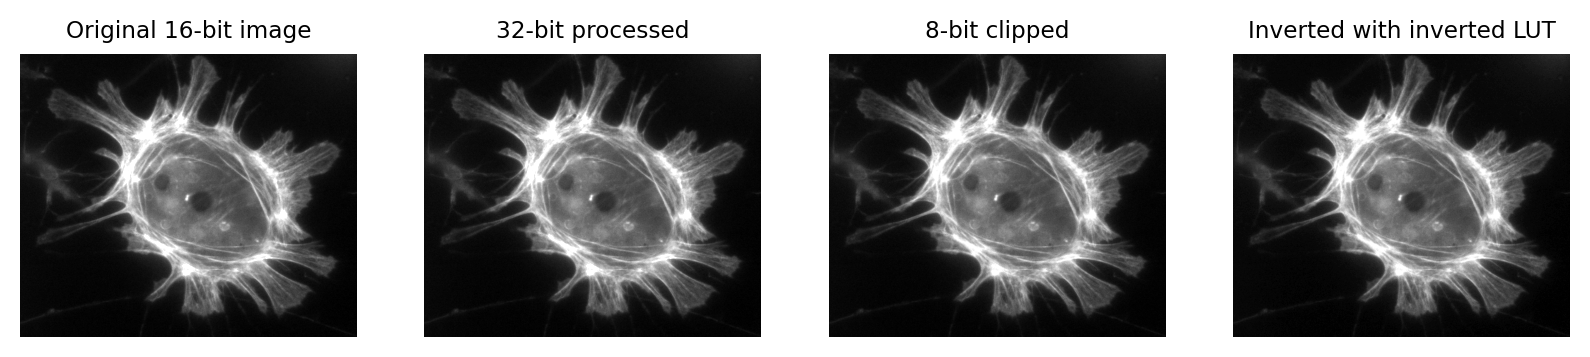


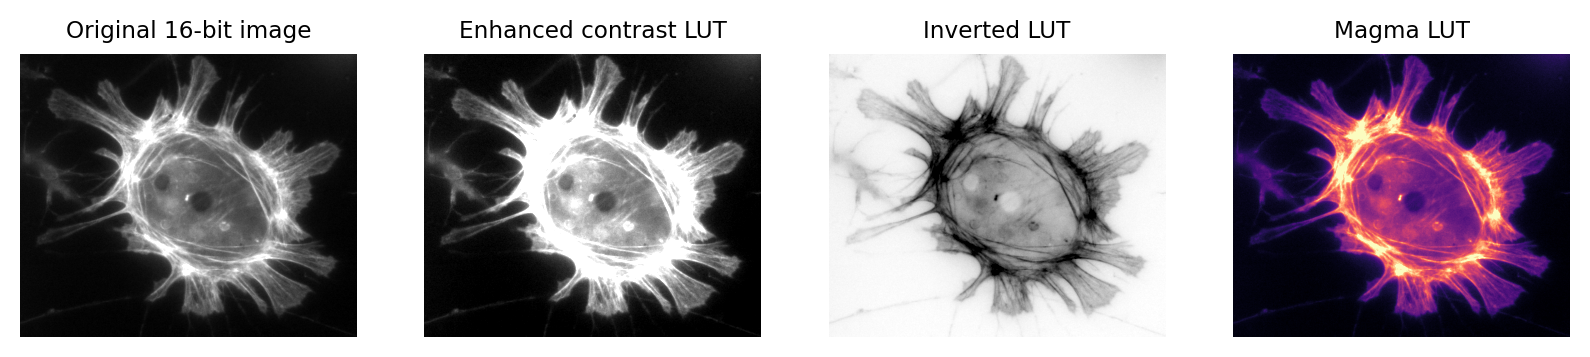

# Lets dive a bit into brightness and contrast

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread


In [ ]:
# Load a sample image from imageJ samples
!wget https://imagej.net/ij/images/3_channel_inverted_luts.tif
img = imread('3_channel_inverted_luts.tif')[:,:,0]

# Display the loaded image
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

**Brightness**

Brightness refers to the overall lightness or darkness of an image.
Increasing brightness makes the entire image lighter, while decreasing brightness makes it darker.


In [ ]:
# Simulate brightness change in visualization by adding an offset temporarily
brightness_offset = 10000  # Increase brightness for visualization
visualized_img = img + brightness_offset

# Display the image with the brightness adjustment
plt.imshow(visualized_img, cmap='gray')
plt.title('Brightened Visualization (Simulated)')
plt.colorbar()
plt.show()


In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray', vmax=3000)
plt.colorbar()
plt.show()


**Contrast**

Contrast refers to the difference in intensity between the darkest and brightest parts of an image.
Increasing contrast makes dark areas darker and bright areas brighter, enhancing details.

In [ ]:
# Display the loaded image
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray',  vmin=2000, vmax=20000)
plt.title('Contrasted Visualization')
plt.show()

**# Lets extract some basic stats from images**

### **Mean of pixel values of the entire image**

In [ ]:
np.mean(img)

### **Standard deviation of pixel values of the entire image**

In [ ]:
np.std(img)

### **Histograms displaying pixel distribution of an image**

In [ ]:

# Compute the histogram
number_of_bins = 100
histogram, bins = np.histogram(img.ravel(), bins=number_of_bins)

# Apply logarithm to the histogram counts (avoid log(0) by adding a small value)
log_histogram = np.log(histogram + 1)  # Add 1 to avoid log(0)

# Plot the original histogram
plt.figure(figsize=(12, 5))

# Original histogram
plt.subplot(1, 2, 1)
plt.hist(img.ravel(), bins=number_of_bins, alpha=0.7)
plt.title("Original Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Log-transformed histogram
plt.subplot(1, 2, 2)
plt.bar(bins[:-1], log_histogram, width=np.diff(bins), alpha=0.7)
plt.title("Log-Transformed Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Log(Frequency)")

plt.tight_layout()
plt.show()